In [77]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import csv
from tabulate import tabulate
%matplotlib inline

# Data Handling

In [120]:
strategies = ['none', 'all', 'old_3', 'traf_3', 'clust', 'betw', 'highmod']
vmt = {}
total_time = {}
for strat in strategies:
    vmt[strat] = []
    total_time[strat] = []

with open('traffic_output_rets.csv', 'r') as output_file:
    reader = csv.reader(output_file)
    next(reader)
    for row in reader:
        pkl_file = row[1]
        for strat in strategies:
            if strat in pkl_file:
                vmt[strat].append(float(row[5])-float(row[4]))
                total_time[strat].append(float(row[3])-float(row[2]))
                break
                
with open('traffic_outputs_norets_125.csv', 'r') as output_file:
    reader = csv.reader(output_file)
    #next(reader)
    for row in reader:
        pkl_file = row[1]
        vmt['none'].append(float(row[5])-float(row[4]))
        total_time['none'].append(float(row[3])-float(row[2]))
        
with open('test_output_all.csv', 'r') as output_file:
    reader = csv.reader(output_file)
    #next(reader)
    for row in reader:
        pkl_file = row[1]
        vmt['all'].append(float(row[5])-float(row[4]))
        total_time['all'].append(float(row[3])-float(row[2]))
        
full_titles = {'none': 'No Retrofits Baseline',
               'all': 'All Retrofits',
               'old_3': 'Oldest Bridges Ranking',
               'traf_3': 'Highest-Traffic Ranking',
               'clust': 'Local Clustering Strategy',
               'betw': 'Betweenness Strategy',
               'highmod': 'High Modularity Strategy'}

# Scatterplot

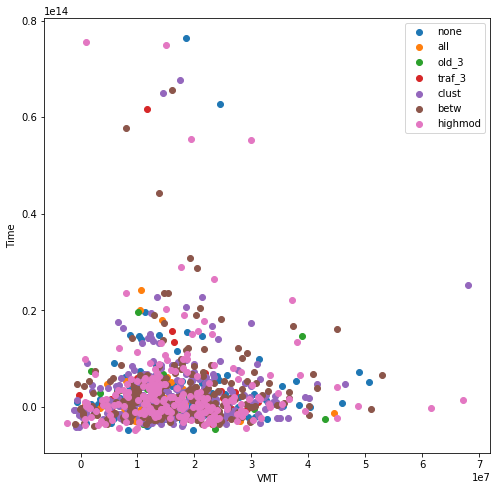

In [121]:
plt.figure(figsize=(8,8))
for strat in strategies:
    plt.scatter(vmt[strat], total_time[strat], label=strat)
plt.xlabel('VMT')
plt.ylabel('Time')
plt.legend()
plt.show()

# Stats

In [122]:
statistics = []
headers = ['time_median', 'time_mean', 'time_stdev', 'vmt_median', 'vmt_mean', 'vmt_stdev']

for strat in strategies:
    strat_stats = [strat]
    strat_stats.append(np.median(total_time[strat]))
    strat_stats.append(np.mean(total_time[strat]))
    strat_stats.append(np.std(total_time[strat]))
    strat_stats.append(np.median(vmt[strat]))
    strat_stats.append(np.mean(vmt[strat]))
    strat_stats.append(np.std(vmt[strat]))
    statistics.append(strat_stats)
        
print tabulate(statistics, headers)

           time_median    time_mean    time_stdev    vmt_median     vmt_mean    vmt_stdev
-------  -------------  -----------  ------------  ------------  -----------  -----------
none       8.6e+11      3.05352e+12   9.68855e+12   1.58713e+07  1.71591e+07  9.70858e+06
all       -2.95155e+11  1.42741e+12   5.43937e+12   1.10617e+07  1.2805e+07   7.73944e+06
old_3      1.40758e+12  2.21479e+12   5.37462e+12   1.38127e+07  1.67481e+07  9.96024e+06
traf_3     1.55235e+12  4.65152e+12   1.24069e+13   1.63921e+07  1.73675e+07  8.19597e+06
clust      1.76013e+12  3.24024e+12   7.64726e+12   1.46628e+07  1.65758e+07  9.61777e+06
betw       1.44031e+12  3.37657e+12   7.98363e+12   1.54639e+07  1.68241e+07  9.31914e+06
highmod    1.17678e+12  3.54837e+12   9.99195e+12   1.59799e+07  1.73781e+07  1.00941e+07


# Histograms

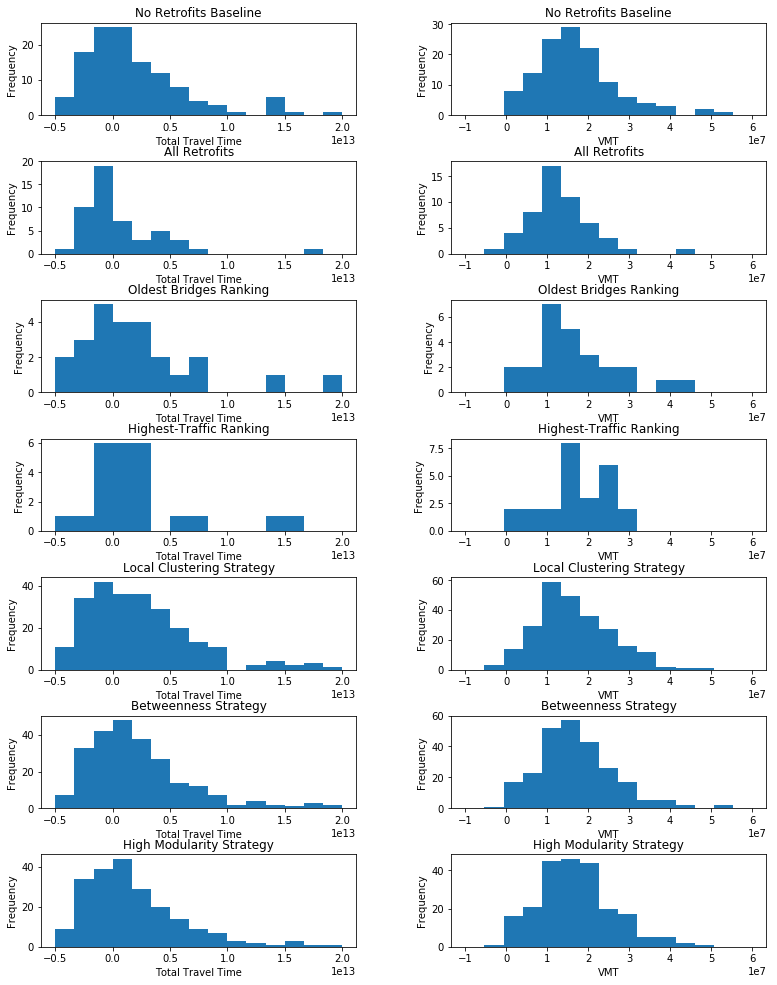

In [123]:
count = 1
plt.figure(figsize=(13,17))
for strat in strategies:
    plt.subplot(len(strategies), 2, count)
    plt.hist(total_time[strat], range=(-5e12, 2e13), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('Total Travel Time')
    plt.ylabel('Frequency')
    
    plt.subplot(len(strategies), 2, count+1)
    plt.hist(vmt[strat], range=(-1e7, 6e7), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('VMT')
    plt.ylabel('Frequency')
    
    count += 2
    
plt.subplots_adjust(hspace=.5, wspace=0.3)
plt.show()

# Boxplot

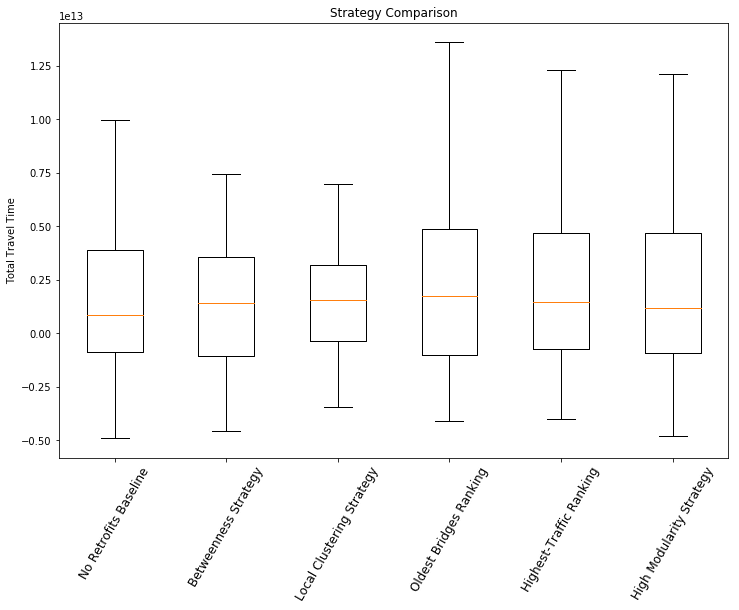

In [118]:
plt.figure(figsize=(12, 8))
full_data = [total_time[strat] for strat in strategies]
plt.boxplot(full_data, 0, '')
plt.title('Strategy Comparison')
plt.ylabel('Total Travel Time')
ax = plt.gca()
titles_array = [v for k,v in full_titles.items()]
ax.set_xticklabels(titles_array, rotation = 60, size=12)
plt.show()